In [143]:
#importing some libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading for data
data_time = pd.read_csv("Births2015.csv", index_col=[0], parse_dates=[0], squeeze= True)
#r:- It converts a normal string to a raw string
#parse_data is used for change in date format // to --
#squeeze is used for change data type as pandas.core.frame.DataFrame to pandas.core.series.Series

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8592\2965241038.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data_time = pd.read_csv("Births2015.csv", index_col=[0], parse_dates=[0], squeeze= True)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15/01/2015' i

In [4]:
data_time.head()

date
2015-01-01     8068
2015-02-01    10850
2015-03-01     8328
2015-04-01     7065
2015-05-01    11892
Name: births, dtype: int64

In [5]:
type(data_time)

pandas.core.series.Series

In [6]:
#time series algorithm required array values
series_value = data_time.values
series_value

array([ 8068, 10850,  8328,  7065, 11892, 12425, 12141, 12094, 11868,
        8014,  7172, 11479, 11924, 12013, 12339, 11861,  8280,  7195,
       10602, 12242, 12086, 11949, 11910,  8235,  7186, 11728, 11882,
       11602, 11967, 11571,  7987,  7139, 11480, 12079, 11924, 11821,
       11656,  8285,  7265, 11937, 12291, 11911, 12285, 11321,  8390,
        7508, 11038, 11952, 12061, 11968, 11864,  8343,  7254, 11260,
       11941, 11828, 11672, 11596,  7989,  7273, 11609, 12402, 11927,
       11681, 11612,  7980,  6929, 11678, 12282, 11850, 12042, 10940,
        8217,  7202, 11537, 12312, 11807, 11721, 12040,  8080,  7171,
       11674, 12333, 11872, 12065, 11629,  8071,  7125, 11500, 12362,
       11596, 12296, 11234,  7981,  6821, 11455, 12334, 11976, 11874,
       11724,  8092,  7141, 11503, 12309, 11794, 11947, 11718,  8028,
        7180, 11513, 12173, 11917, 11877, 11749,  8101,  7178, 11494,
       12221, 11775, 11831, 12178,  8075,  7195, 11724, 12618, 11924,
       11649, 11810,

In [7]:
type(series_value)

numpy.ndarray

In [8]:
data_time.size

365

In [9]:
data_time.describe()

count      365.000000
mean     10899.991781
std       2076.683881
min       6515.000000
25%       8431.000000
50%      11883.000000
75%      12339.000000
max      13949.000000
Name: births, dtype: float64

<AxesSubplot: xlabel='date'>

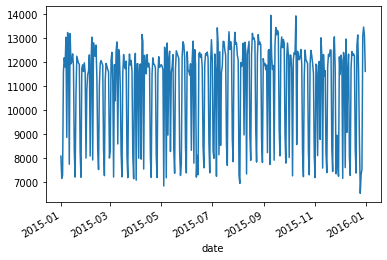

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
data_time.plot()

In [120]:
#stationary things is imp in time series, indicates that crack factor and like a constant d
#rolling is perticular time period 
data_time_mean = data_time.rolling(window = 40).mean()

<AxesSubplot: xlabel='date'>

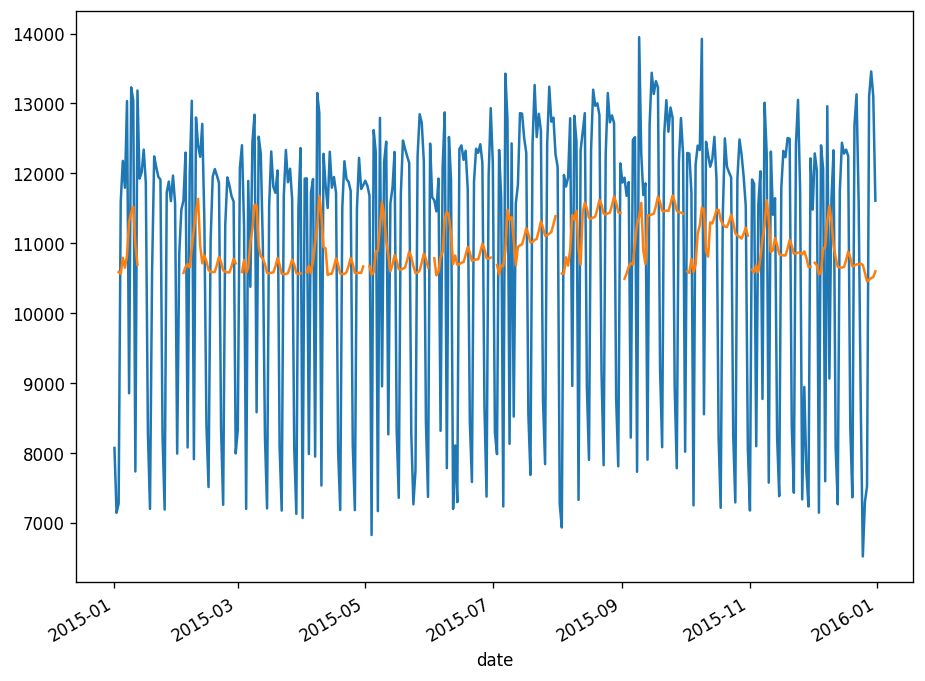

In [121]:
data_time.plot()
data_time_mean.plot()

<AxesSubplot: xlabel='date'>

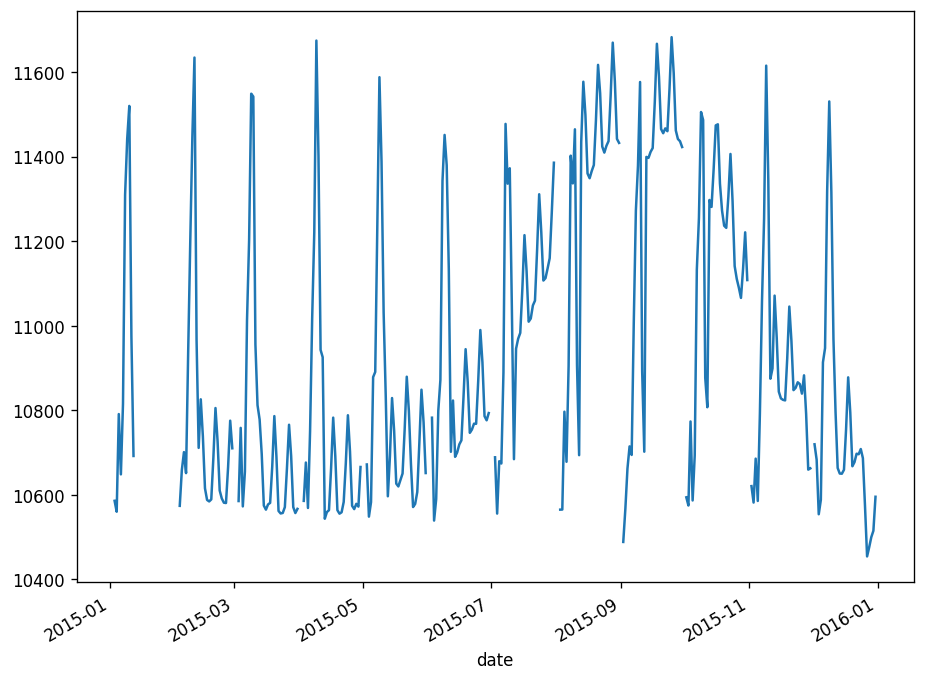

In [122]:
data_time_mean.plot()

Baseline model

In [14]:
#baseline model, autorequested, ARIMA model, seasonal ARIMA model
#previous order is same like future assumption, baseline model depends upon historical data
#ex: yesterday's stock price will be next day stock price (t+1)
value = pd.DataFrame(series_value)
birth_df = pd.concat([value, value.shift(1)], axis=1)
birth_df.head()

,0,0
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [15]:
birth_df.columns = ['Actual_birth', 'Forecast_birth']
birth_df.head()

,Actual_birth,Forecast_birth
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [16]:
from sklearn.metrics import mean_squared_error 
import numpy as np 

In [17]:
birth_test = birth_df[1:]
birth_test.head()


,Actual_birth,Forecast_birth
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0


In [18]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)
birth_error

5162403.576923077

In [19]:
np.sqrt(birth_error)

2272.092334594498

ARIMA means “autoregressive integrated moving average.”
ARIMA is to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series

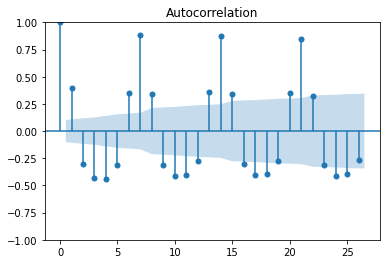

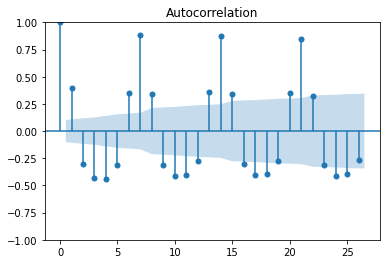

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_time) # to find value of q

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


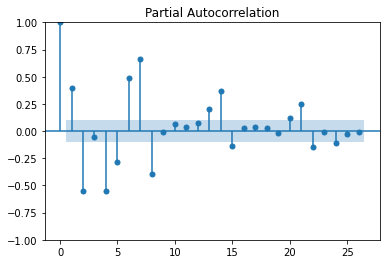

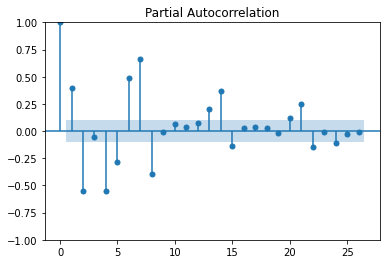

In [24]:
plot_pacf(data_time) # to find value of p

Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 1. 

"ARIMA(p,d,q)" model, where: p is the number of autoregressive terms, d is the number of nonseasonal differences needed for stationarity, and. q is the number of lagged forecast errors in the prediction equation.

In [138]:
#Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_time.iloc[:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('No of lags: %f' % result[2])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.601399
p-value: 0.482890
No of lags: 14.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Here we can see that the p-value is more than 0.05 this means our null hypothesis will be rejected and we will take this series as non-stationary. Let’s make a plot of this data 

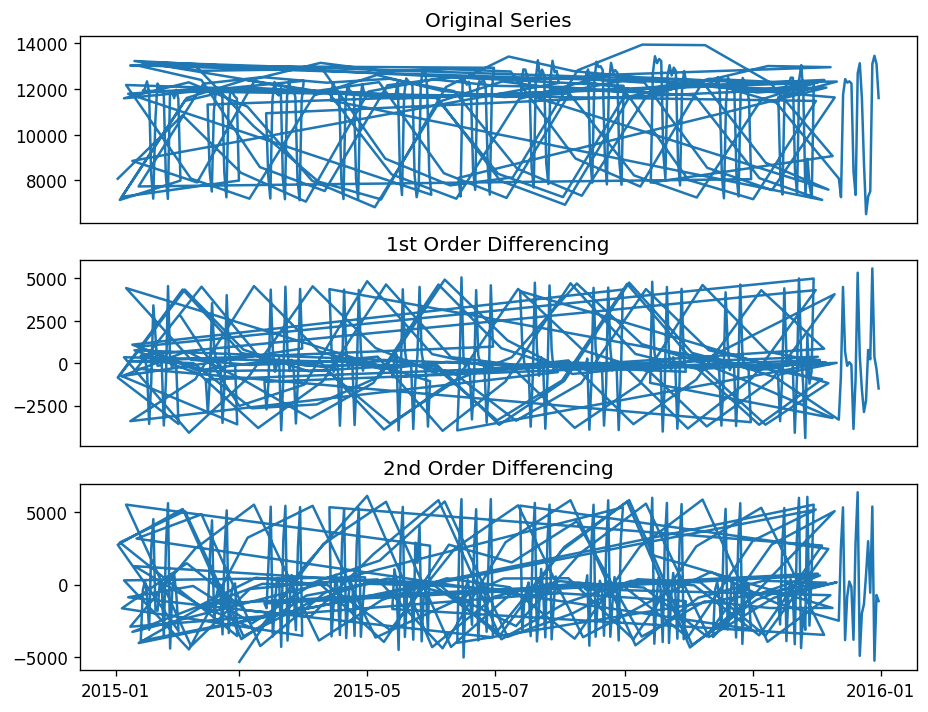

In [41]:
#finding d value
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data_time.iloc[:]); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data_time.iloc[:].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data_time.iloc[:].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


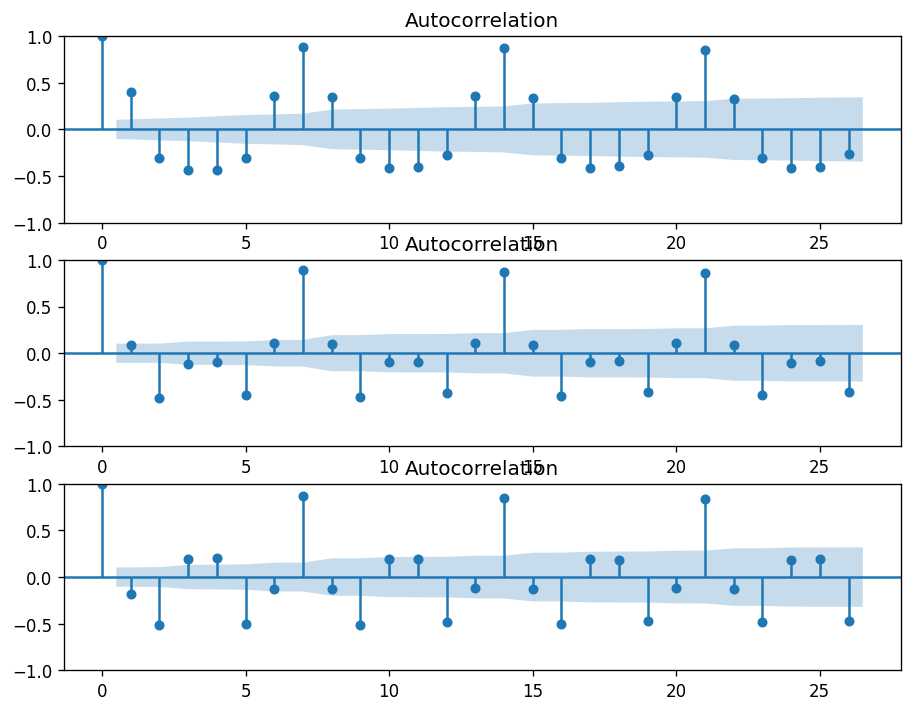

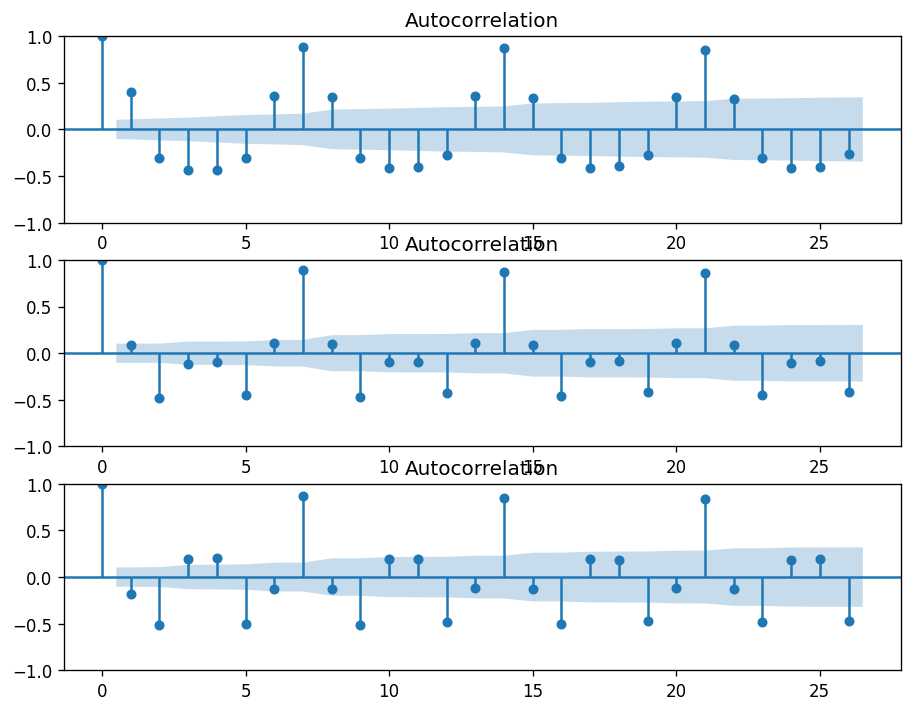

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data_time.iloc[:], ax=ax1)
plot_acf(data_time.iloc[:].diff().dropna(), ax=ax2)
plot_acf(data_time.iloc[:].diff().diff().dropna(), ax=ax3)

Here we can see that in second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference.

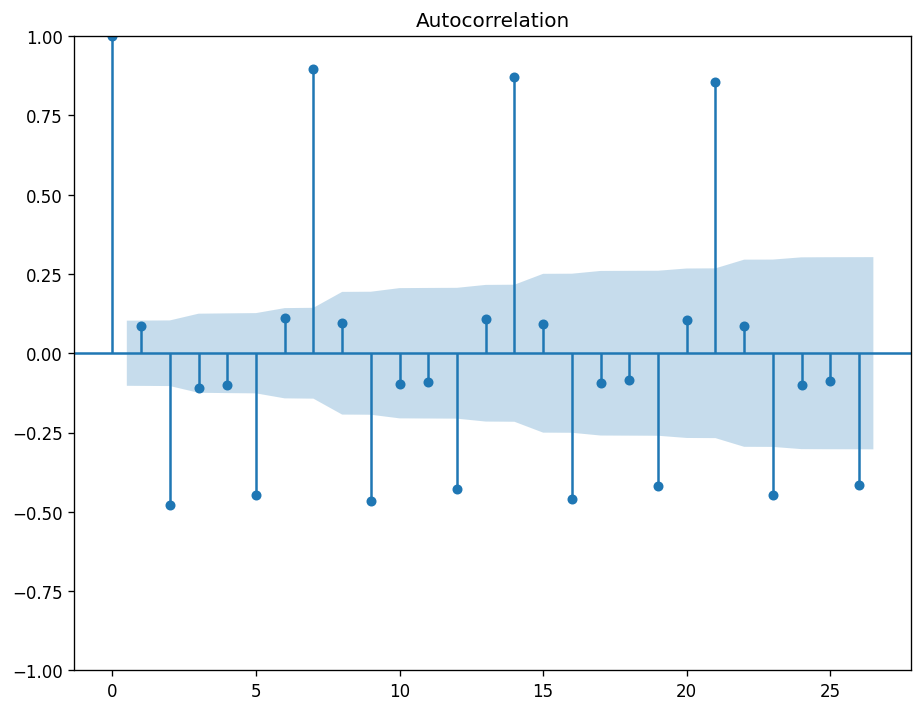

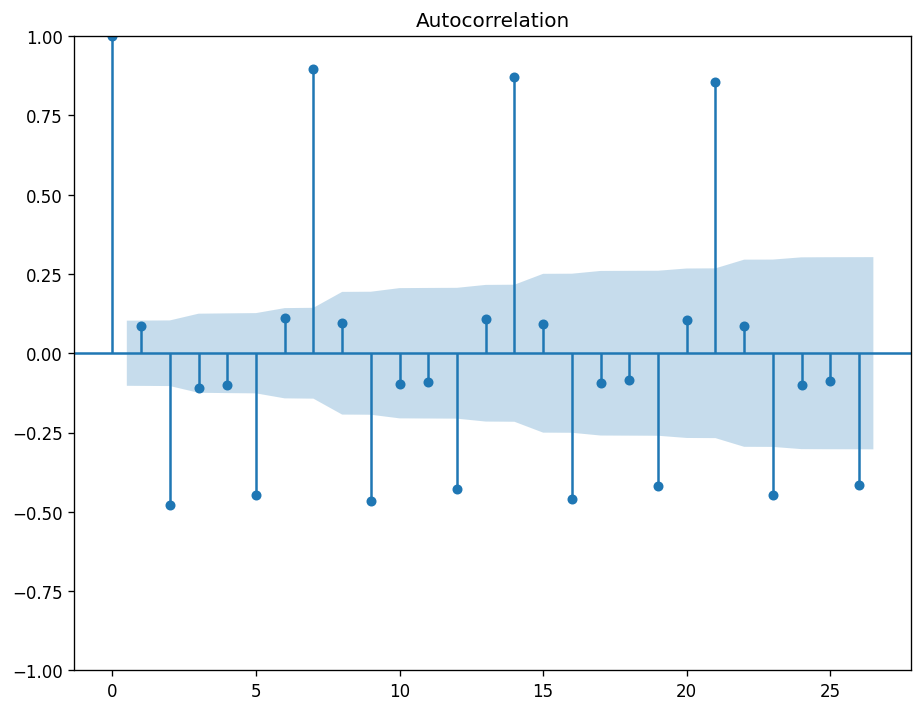

In [43]:
plot_acf(data_time.diff().dropna())

Here we can see that 2 of the lags are out of the significance limit so we can say that the optimal value of our q (MA) is 2.

## Building ARIMA model

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_time, order = (1,1,2))
model_fit = model.fit(disp=0)
model_fit.summary()

In [47]:
data_time.size
birth_train = data_time[0:330]
birth_test =  data_time[330:365]

In [156]:
from statsmodels.tsa.arima.model import ARIMA # replace _ to . if you are getting error
birth_model = ARIMA(birth_train, order = (1,1,2)) #(1,1,2)
birth_model_fit = birth_model.fit()

In [157]:
birth_model_fit.aic # Akaike information criterion (AIC) smaller is better

5819.0431159218915

In [152]:
from statsmodels.tsa.arima.model import ARIMA # replace _ to . if you are getting error
birth_model1 = ARIMA(birth_train, order = (3,1,3)) 
birth_model_fit1 = birth_model1.fit()

In [153]:
birth_model_fit1.aic # Akaike information criterion (AIC) smaller is better

5746.458388367035

In [128]:
birth_forecast = birth_model_fit1.forecast(steps = 35)
birth_forecast

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


330     9383.085489
331    10192.375614
332    10597.177205
333    10681.656231
334    10657.766958
335    10728.670274
336    10770.366161
337    10712.948445
338    10708.033197
339    10760.974996
340    10744.919552
341    10707.224773
342    10735.968995
343    10756.201976
344    10723.950712
345    10719.866680
346    10748.621313
347    10740.537562
348    10719.600348
349    10734.784091
350    10746.305065
351    10728.924064
352    10726.200170
353    10741.904623
354    10737.903859
355    10726.302765
356    10734.313645
357    10740.858408
358    10731.501443
359    10729.747074
360    10738.316835
361    10736.358955
362    10729.938106
363    10734.156293
364    10737.864979
Name: predicted_mean, dtype: float64

In [129]:
birth_test

date
2015-11-27     8942
2015-11-28     7734
2015-11-29     7230
2015-11-30    12214
2015-01-12    13185
2015-02-12    12708
2015-03-12    12281
2015-04-12    11828
2015-05-12     8262
2015-06-12     7194
2015-07-12    11567
2015-08-12    12328
2015-09-12    11857
2015-10-12    12259
2015-11-12    11406
2015-12-12     8073
2015-12-13     7262
2015-12-14    11753
2015-12-15    12437
2015-12-16    12282
2015-12-17    12339
2015-12-18    12247
2015-12-19     8368
2015-12-20     7361
2015-12-21    12692
2015-12-22    13131
2015-12-23    11595
2015-12-24     8714
2015-12-25     6515
2015-12-26     7294
2015-12-27     7518
2015-12-28    13100
2015-12-29    13458
2015-12-30    13100
2015-12-31    11608
Name: births, dtype: int64

In [130]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

2273.4141299313546

<AxesSubplot: >

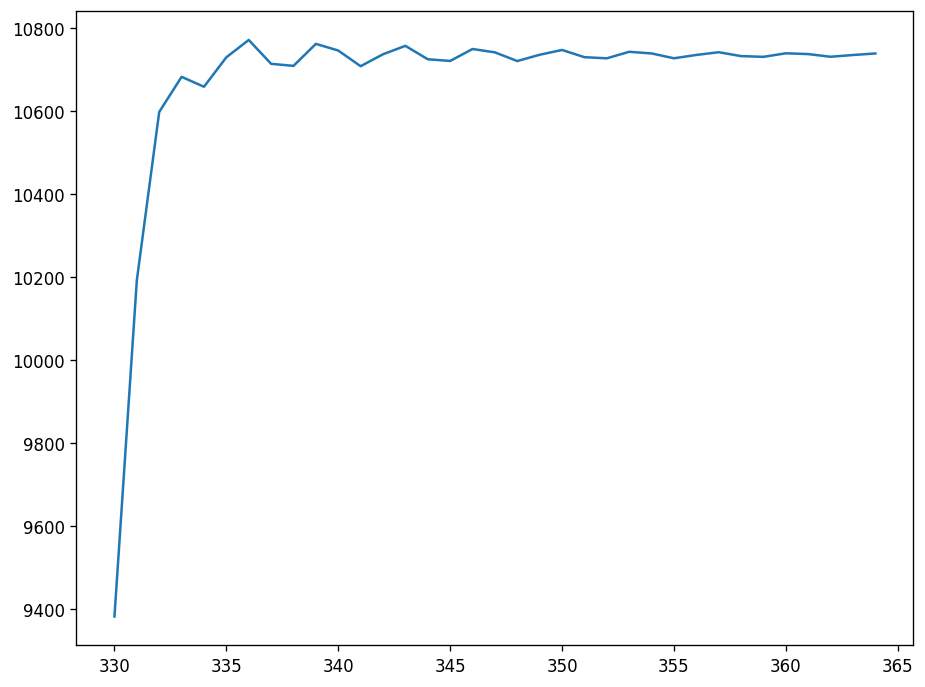

In [125]:
birth_forecast.plot()

## Conclusion
we have discussed the process of finding the values of parameters in the ARIMA modelling. One thing that is also noticeable here is the AIC value that needs to be lower while performing the ARIMA modelling. We can reduce this term by changing the values of the q parameter. 

## Another way to find best p, d, and q values

In [147]:
from inspect import trace
stepwise_fit = auto_arima(data_time, trace =True , suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6663.297, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6661.913, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6641.598, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6661.305, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6610.802, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6435.324, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6561.448, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6557.321, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6563.450, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.46 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 5.164 seconds


In [148]:
data_time.size
train = data_time[0:330]
test =  data_time[330:365]
print(train.shape, test.shape)

(330,) (35,)


In [149]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_time, order = (2,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3208.419
Date:                Thu, 27 Oct 2022   AIC                           6424.838
Time:                        13:35:34   BIC                           6440.426
Sample:                             0   HQIC                          6431.034
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6347      0.063     10.047      0.000       0.511       0.759
ar.L2         -0.5441      0.068     -8.035      0.000      -0.677      -0.411
ma.L1         -0.9995      0.044    -22.778      0.000      -1.086      -0.914
sigma2      2.577e+06   3.36e+05      7.673      0.000    1.92e+06    3.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                18.47
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.33
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### To make prediction

In [150]:
start = len(train)
end = len(train) + len(test)-1
Prediction = model.predict(start = start, end = end , type ='levels')
print(Prediction)

date
2015-11-27     8179.864295
2015-11-28    11605.263510
2015-11-29     9950.738048
2015-11-30    10279.891954
2015-01-12    13723.389080
2015-02-12    11626.200608
2015-03-12    10798.352869
2015-04-12    10791.311899
2015-05-12    10739.218300
2015-06-12     8714.934911
2015-07-12     9972.863694
2015-08-12    13334.307207
2015-09-12    11434.935511
2015-10-12    10723.154020
2015-11-12    11239.094431
2015-12-12    10479.435895
2015-12-13     8821.040993
2015-12-14    10115.291266
2015-12-15    13411.826298
2015-12-16    11399.525476
2015-12-17    10931.514558
2015-12-18    11056.079843
2015-12-19    10970.087410
2015-12-20     8550.642792
2015-12-21    10018.718257
2015-12-22    13957.914478
2015-12-23    11333.524842
2015-12-24    10120.474885
2015-12-25     9123.655114
2015-12-26     9288.176193
2015-12-27    10973.535987
2015-12-28    10682.176757
2015-12-29    14110.022000
2015-12-30    11298.178403
2015-12-31    10881.157544
Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='date'>

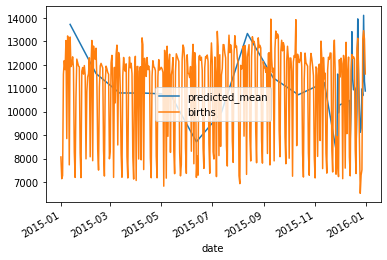

In [151]:
Prediction.plot(legend=True)
data_time.plot(legend=True)